### Column Descriptions


## People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

## Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

    NumWebPurchases: Number of purchases made through the company's website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import TSNE
import datetime

## Data collection and Analysis

In [2]:
customer_data = pd.read_csv('dataset/marketing_campaign.csv', sep=';')

In [3]:
# First 5 rows
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Number of rows and columns
customer_data.shape

(2240, 29)

## Exploratory Analysis

In [5]:
# Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Checking for missing values
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are some missing **Income** values.

In [7]:
customer_data.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


The columns Z_CostContact and Z_Revenue have the same max and min, which means all the values are the same. Plus there isn't information about what those columns mean so they will be removed.
The ID column won't be necessary either.

In [8]:
customer_data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [9]:
customer_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### Converting Dt_Customer to timestamps

In [10]:
dt_customer_as_date = pd.to_datetime(customer_data['Dt_Customer'])

In [11]:
customer_data['Dt_Customer'] = dt_customer_as_date.apply(lambda x: x.timestamp())

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   float64
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

### Re-Ordering Columns

In [13]:
new_order = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']

In [14]:
customer_data_ordered = customer_data[new_order]

In [15]:
customer_data_ordered.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response'],
      dtype='object')

In [16]:
customer_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   float64
 7   Recency              2240 non-null   int64  
 8   Complain             2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Checking distribution and outliers

### Year of Birth

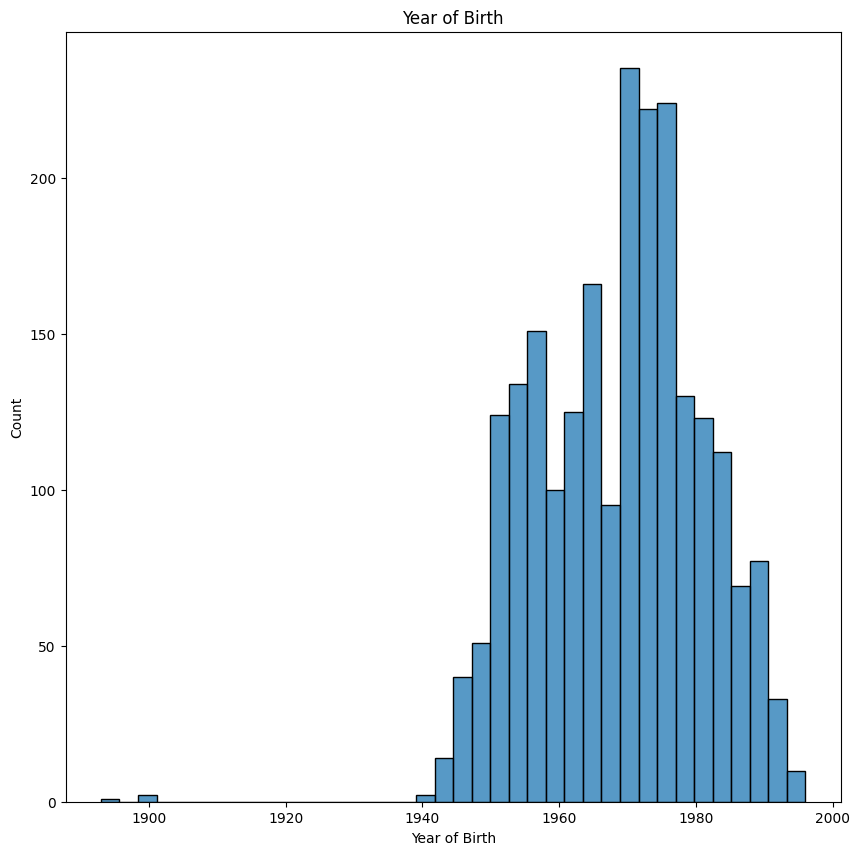

In [17]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Year_Birth')
plt.title('Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()

In [18]:
customer_data_ordered.loc[customer_data_ordered['Year_Birth'] < 1940]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,1.380154e+09,99,1,15,...,2,1,2,5,0,0,0,0,0,0
239,1893,2n Cycle,Single,60182.0,0,1,1.400285e+09,23,0,8,...,1,0,2,4,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,1.380154e+09,36,0,755,...,4,6,4,1,0,0,0,0,1,0


**There are 3 clients with a year of birth below 1940, they will be removed.**

In [19]:
customer_data_ordered = customer_data_ordered[customer_data_ordered['Year_Birth'] >= 1940]

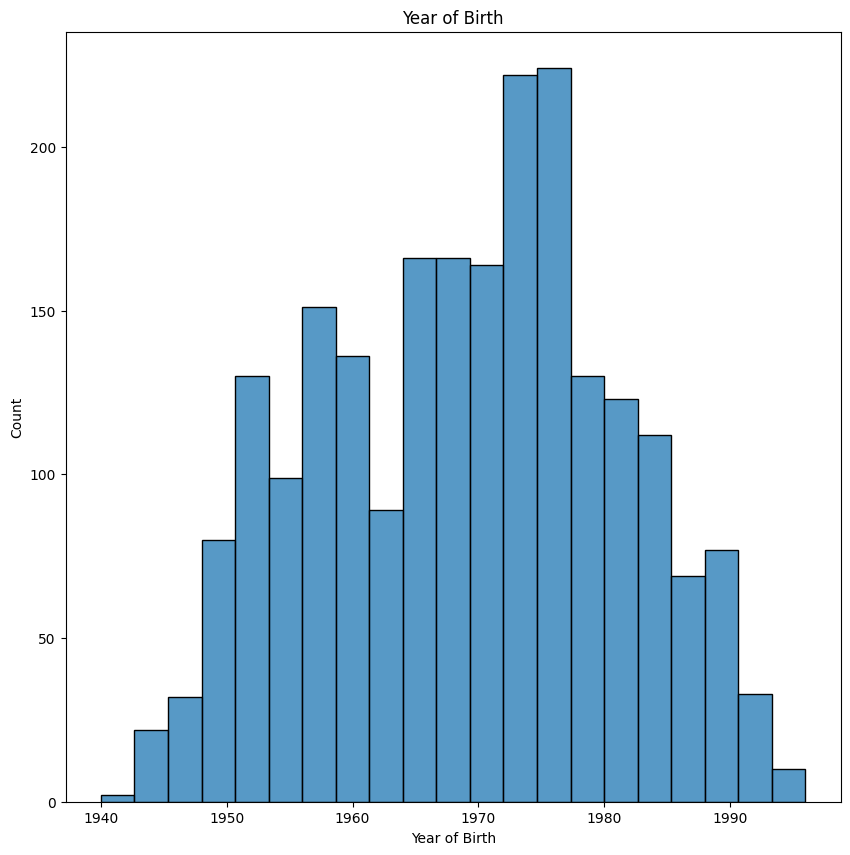

In [20]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Year_Birth')
plt.title('Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()

### Education

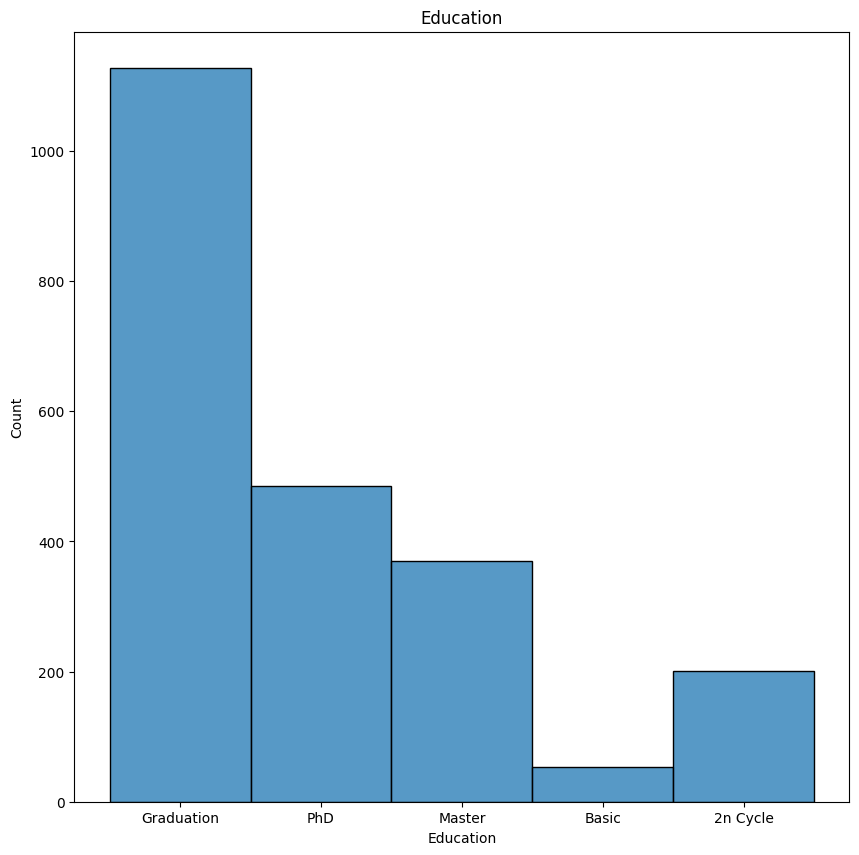

In [21]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Education')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

**Most customers have a Graduation level.**

### Marital Status

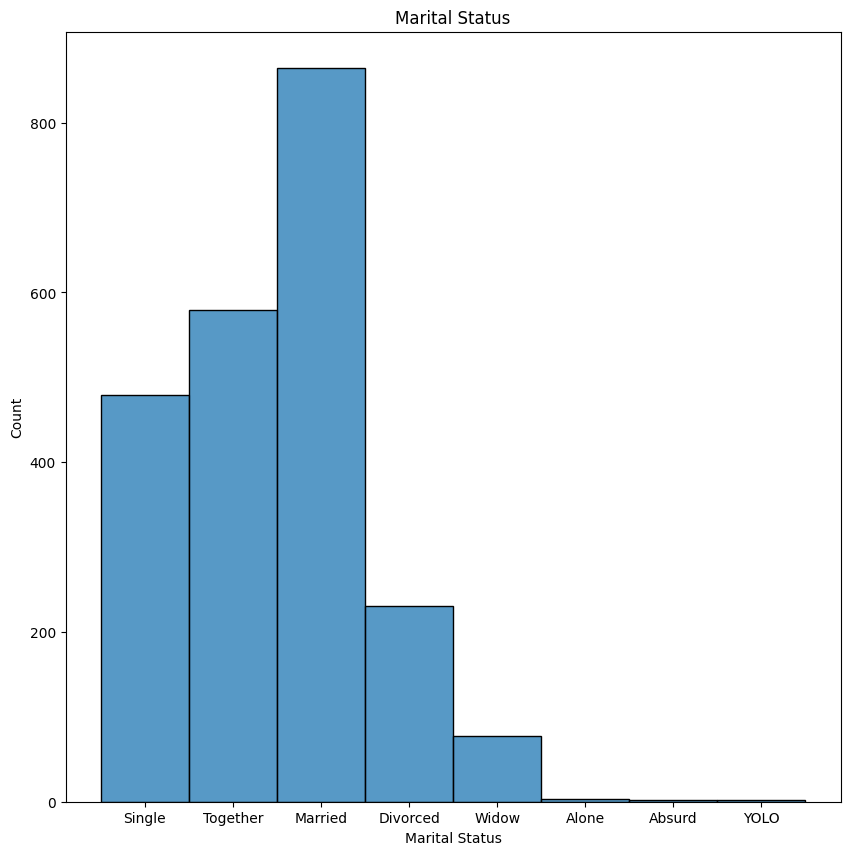

In [22]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Marital_Status')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

The Alone, Absurd and YOLO statuses will be replaced by single.

In [23]:
customer_data_ordered['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}, inplace=True)

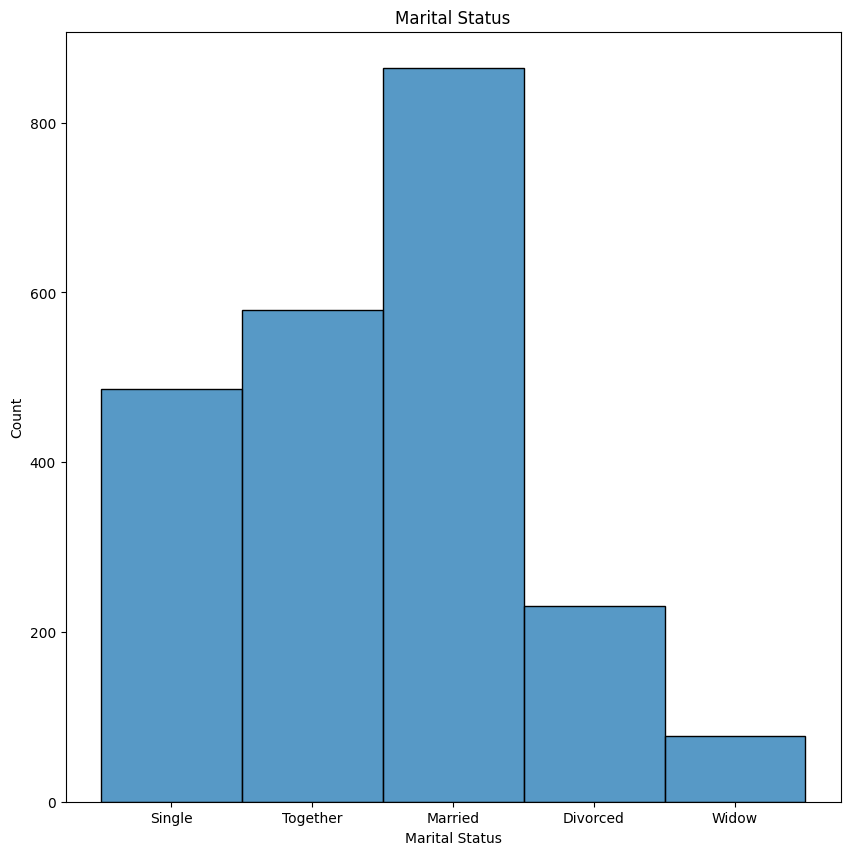

In [24]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Marital_Status')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Income

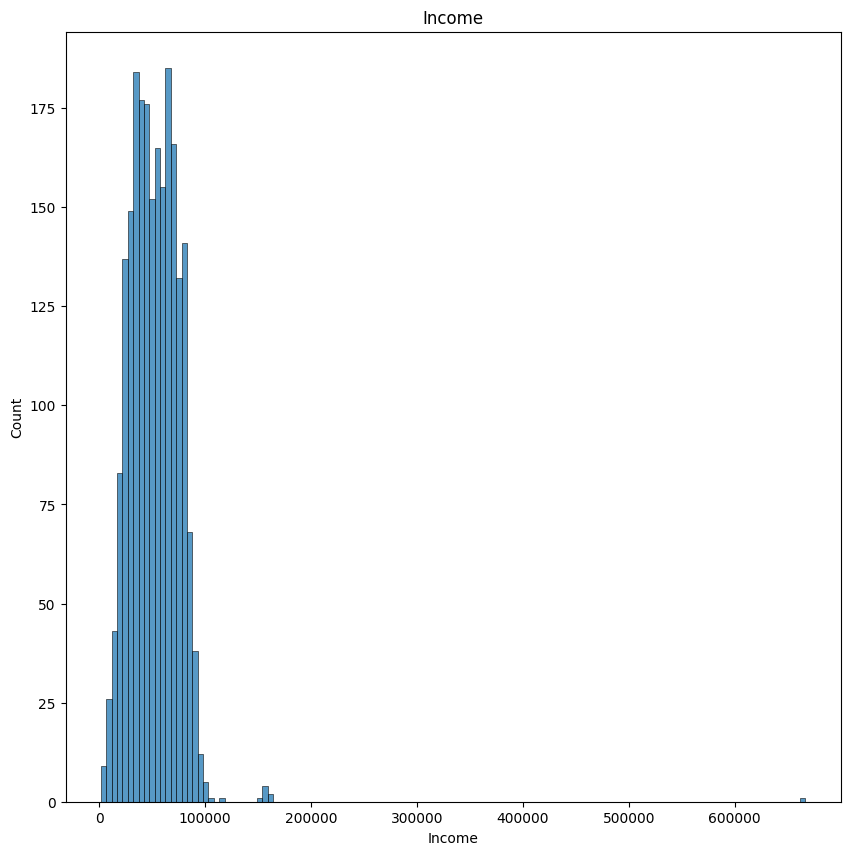

In [25]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Income')
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [26]:
customer_data_ordered.loc[customer_data_ordered['Income'] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
2233,1977,Graduation,Together,666666.0,1,0,1.370131e+09,23,0,9,...,3,1,3,6,0,0,0,0,0,0


**There is one client with and income higher than 600.000, he will be removed as K-Means doesn't work very well with outliers.**

In [27]:
customer_data_ordered = customer_data_ordered[customer_data_ordered['Income'] < 600000]

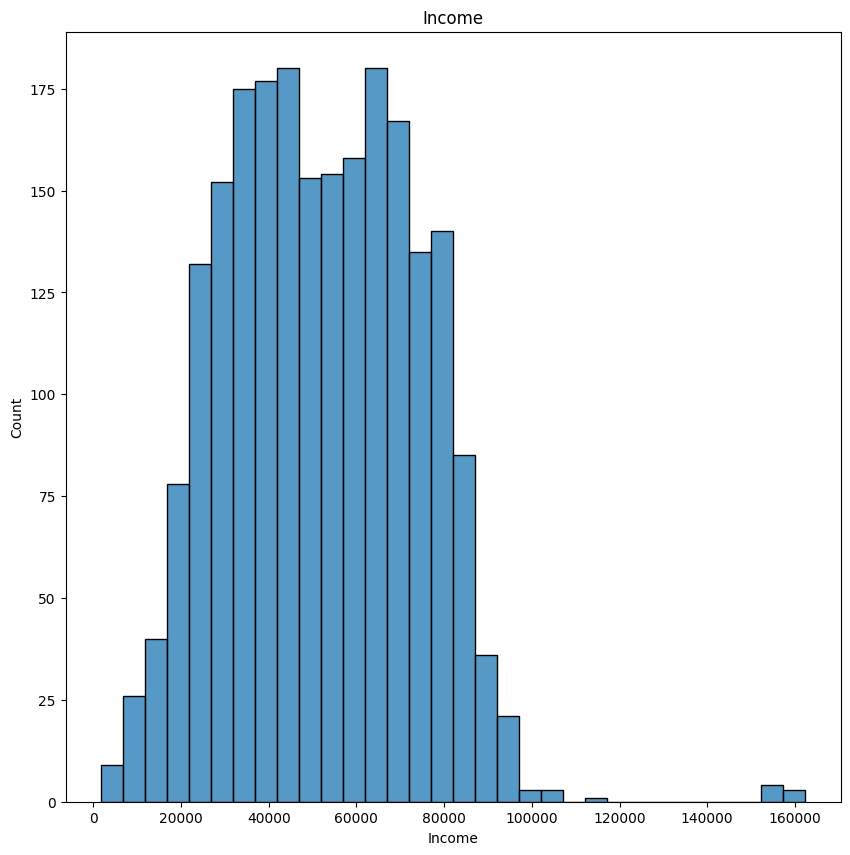

In [28]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Income')
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

**There are other clients above 150.000 that might be considered outliers, but will be kept for now and treated as high income clients.**

### Kid Home

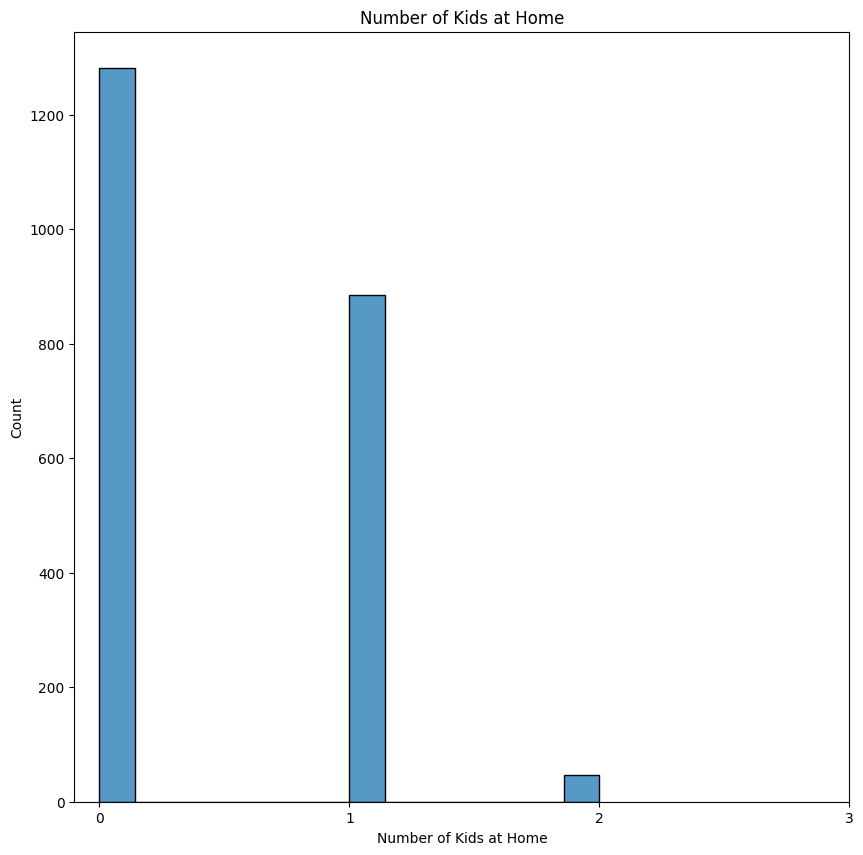

In [29]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Kidhome')
plt.title('Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

**The number of kids at home is rather low and most clients don't have any.**

### Teen Home

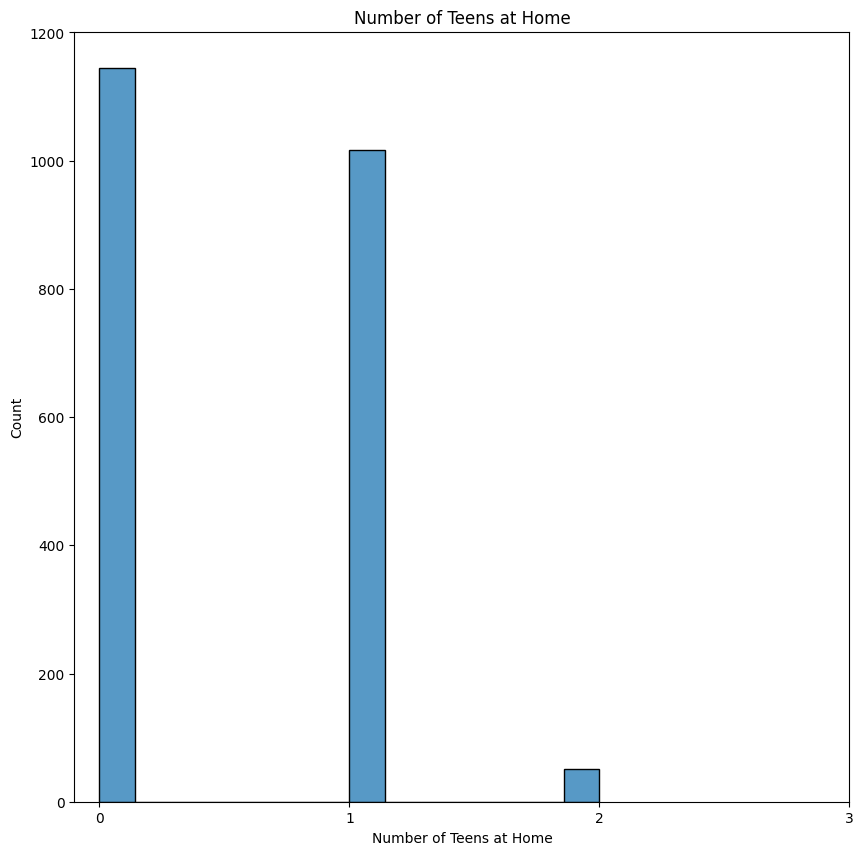

In [30]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Teenhome')
plt.title('Number of Teens at Home')
plt.xlabel('Number of Teens at Home')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

**Similar as the kids at home, the numbers are rather low and most clients don't have teens either.**

#### Comparative table Kids vs Teens

In [31]:
kid_count = customer_data_ordered['Kidhome'].value_counts()
teen_count = customer_data_ordered['Teenhome'].value_counts()

kid_vs_teen = pd.concat([kid_count, teen_count], axis=1)
kid_vs_teen.columns = ['Number of Kids', 'Number of Teens']
kid_vs_teen

,Number of Kids,Number of Teens
0,1281,1144
1,885,1017
2,46,51


**Overall there are more clients with no kids or teens, but among the clients with children the teens numbers are a bit higher.**

### Date of Enrollment

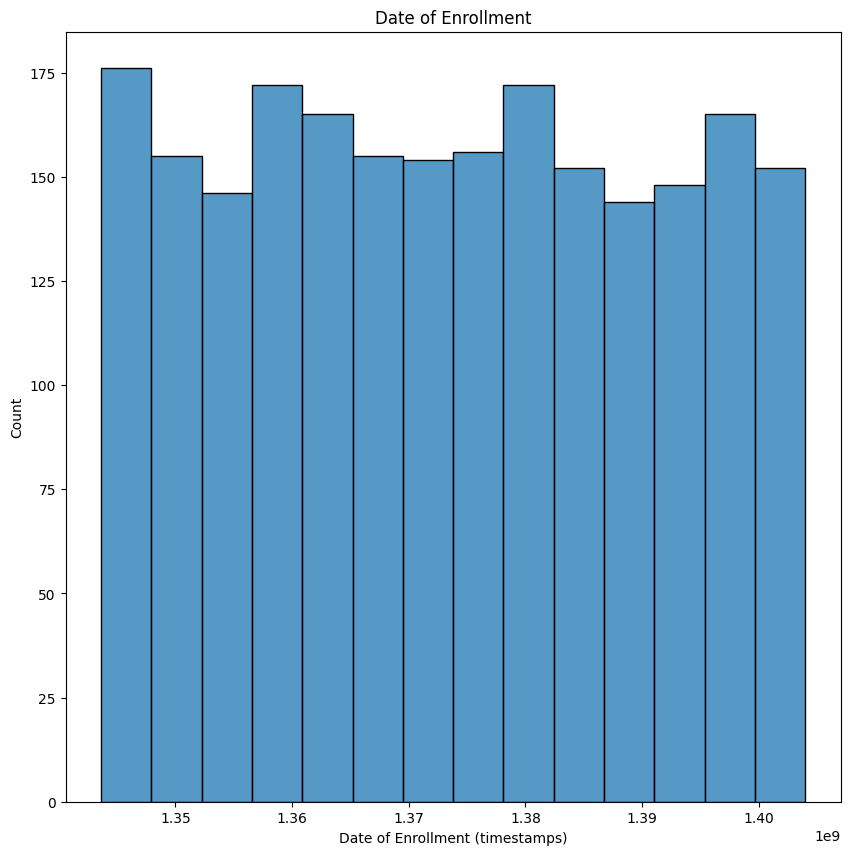

In [32]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Dt_Customer')
plt.title('Date of Enrollment')
plt.xlabel('Date of Enrollment (timestamps)')
plt.ylabel('Count')
plt.show()

**Very evenly distributed.**

## Recency

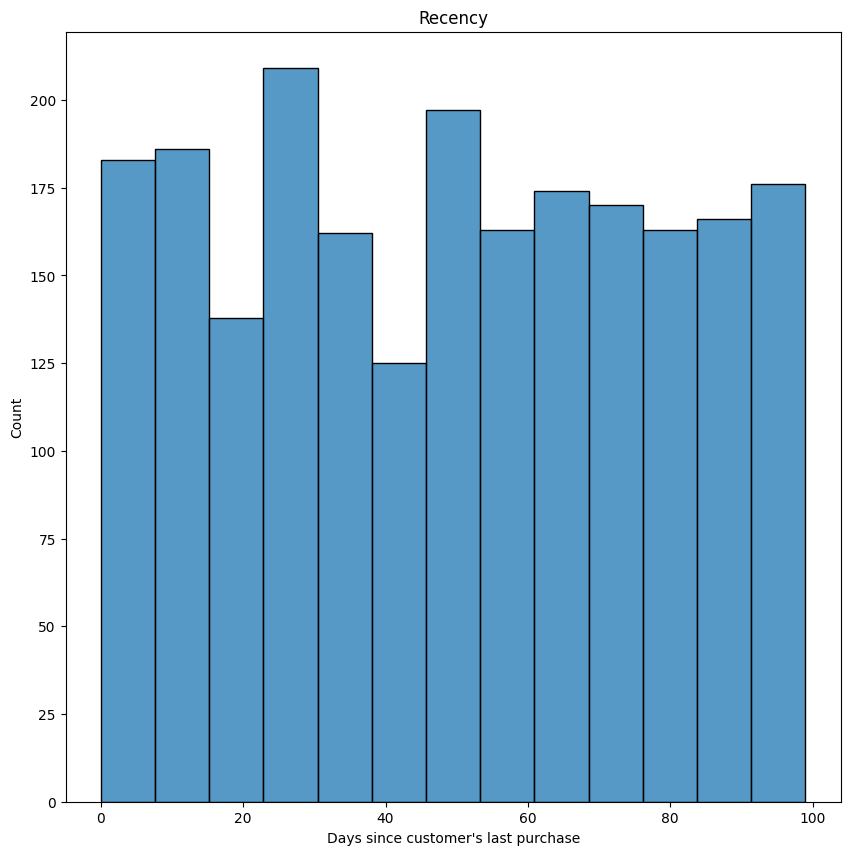

In [33]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Recency')
plt.title('Recency')
plt.xlabel('Days since customer\'s last purchase')
plt.ylabel('Count')
plt.show()

**Very evenly distributed.**

### Complain

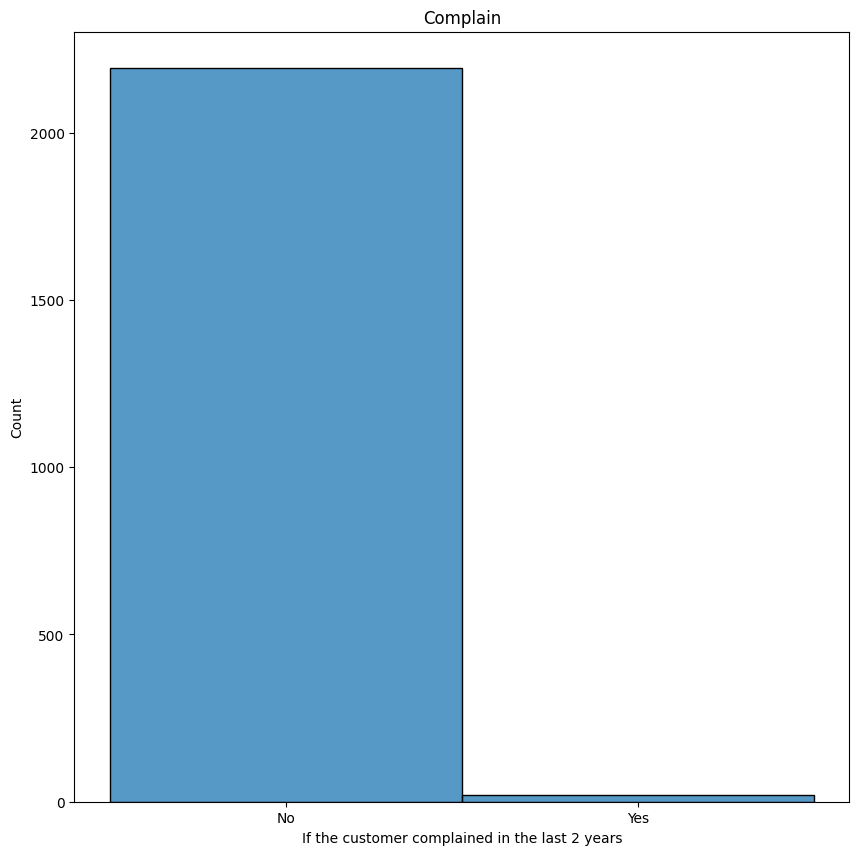

In [34]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Complain', bins=2, binrange=(-0.5, 1.5))
plt.title('Complain')
plt.xlabel('If the customer complained in the last 2 years')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Most clients didn't complain.**

### MntWines

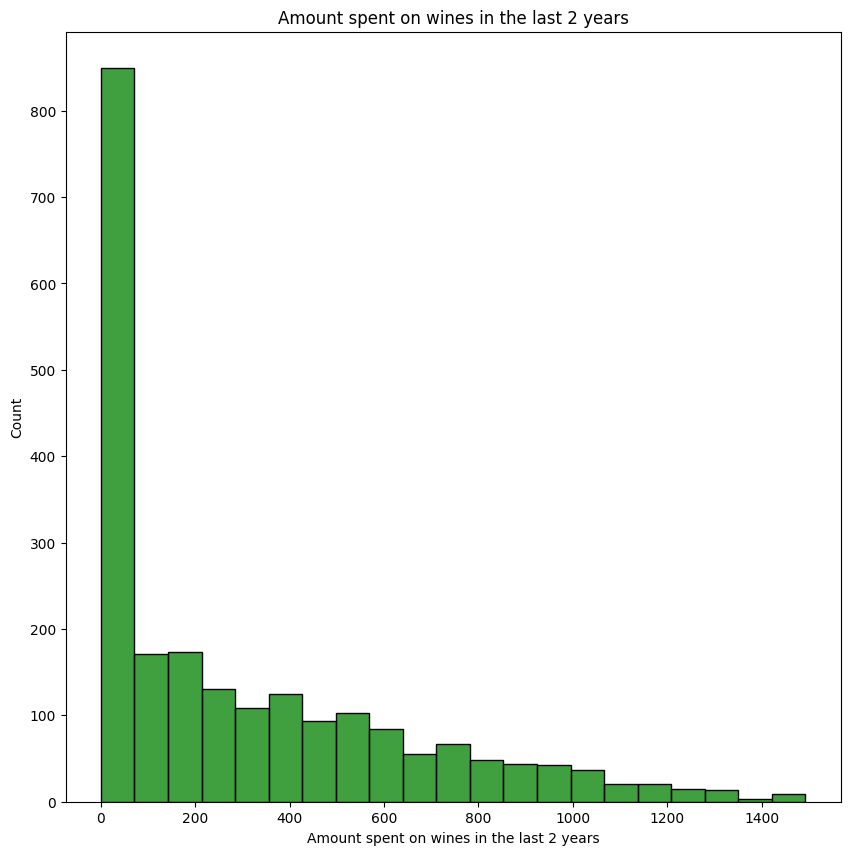

In [35]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntWines', color='green')
plt.title('Amount spent on wines in the last 2 years')
plt.xlabel('Amount spent on wines in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntFruits

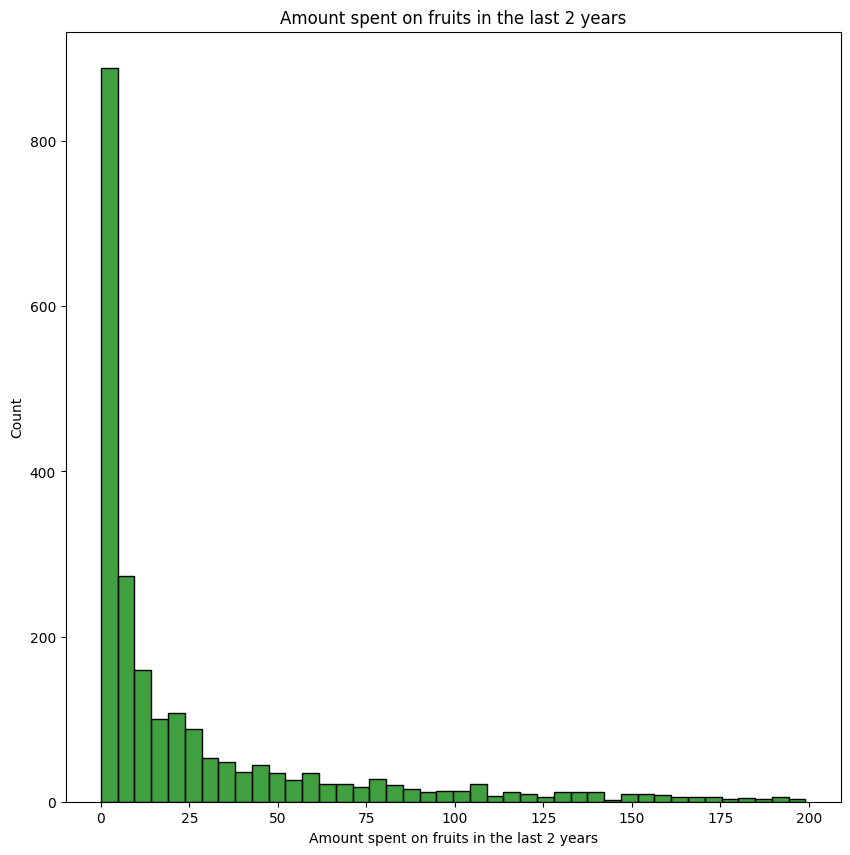

In [36]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntFruits', color='green')
plt.title('Amount spent on fruits in the last 2 years')
plt.xlabel('Amount spent on fruits in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntMeatProducts

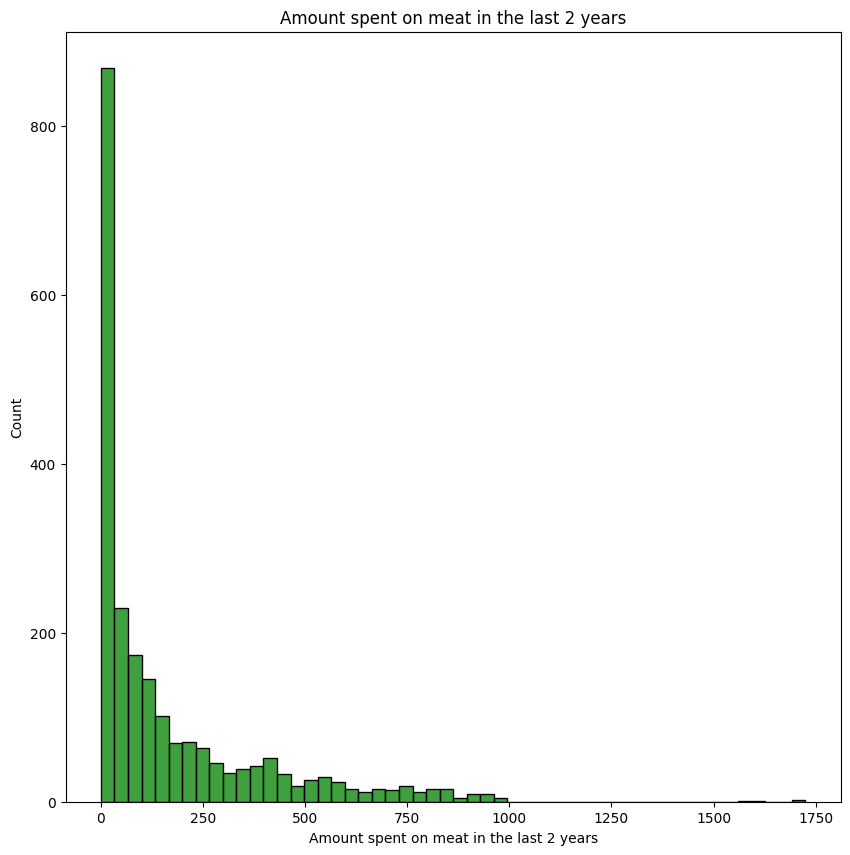

In [37]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntMeatProducts', color='green')
plt.title('Amount spent on meat in the last 2 years')
plt.xlabel('Amount spent on meat in the last 2 years')
plt.ylabel('Count')
plt.show()

In [38]:
customer_data_ordered[customer_data_ordered['MntMeatProducts'] > 1000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
21,1979,Graduation,Married,2447.0,1,0,1.357430e+09,42,0,1,...,0,28,0,1,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,1.393632e+09,98,0,20,...,0,22,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,1.344038e+09,21,0,55,...,0,28,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,1.367194e+09,13,0,1,...,0,28,0,1,0,0,0,0,0,0


**4 Clients that might be outliers, but will be kept for now as they might be big spenders on meat.**

### MntFishProducts

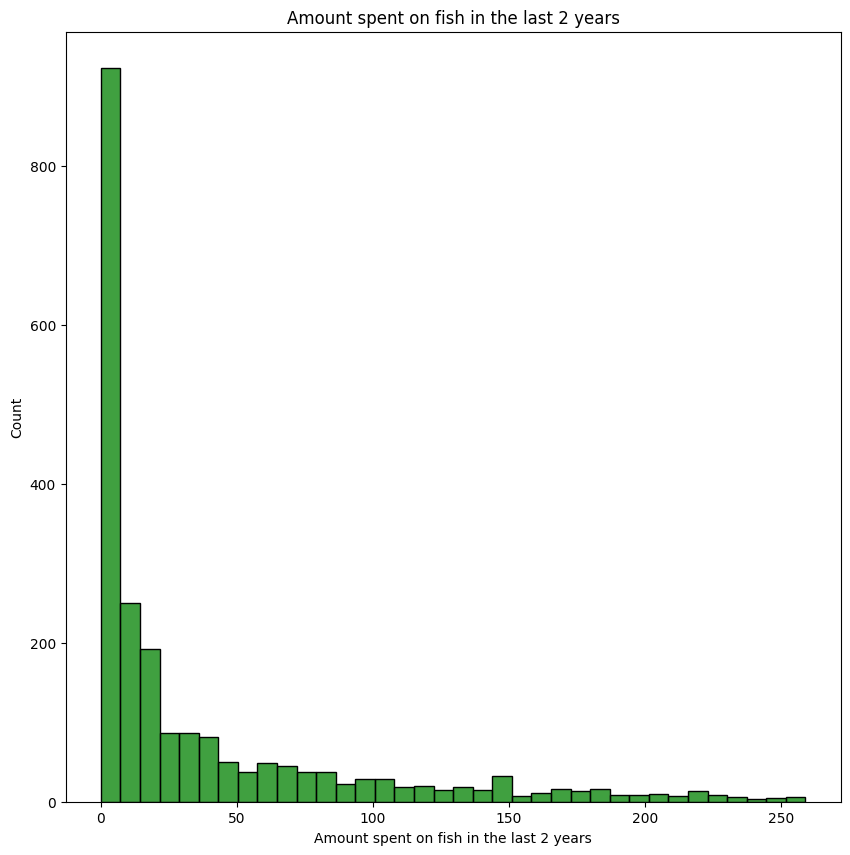

In [39]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntFishProducts', color='green')
plt.title('Amount spent on fish in the last 2 years')
plt.xlabel('Amount spent on fish in the last 2 years')
plt.ylabel('Count')
plt.show()

### MntSweetProducts

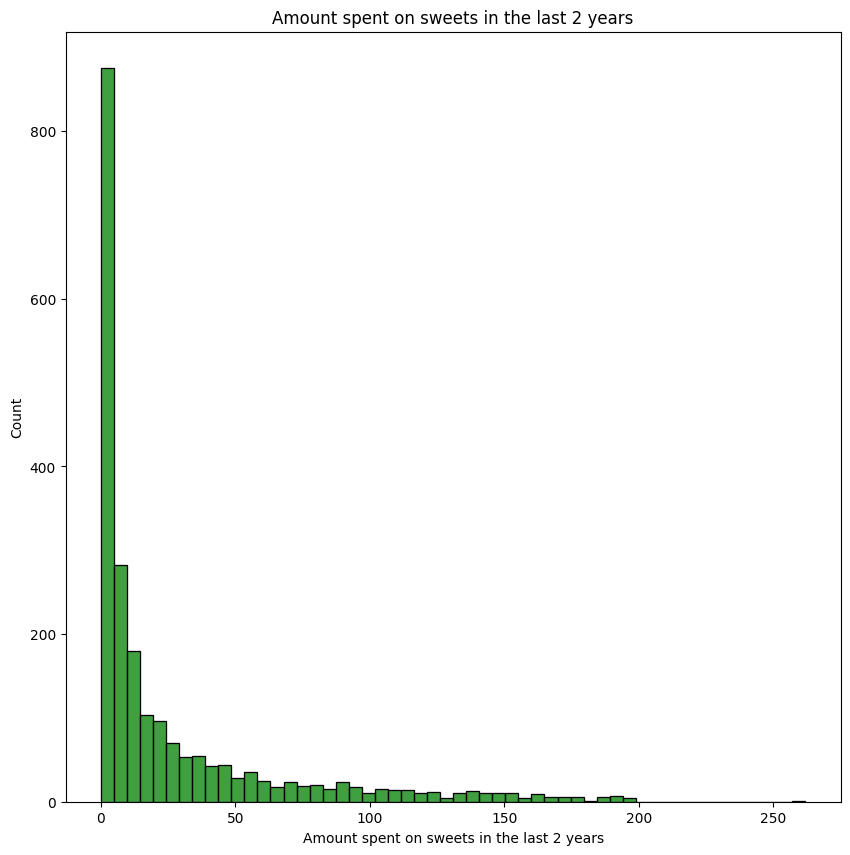

In [40]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntSweetProducts', color='green')
plt.title('Amount spent on sweets in the last 2 years')
plt.xlabel('Amount spent on sweets in the last 2 years')
plt.ylabel('Count')
plt.show()

In [41]:
customer_data_ordered[customer_data_ordered['MntSweetProducts'] > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
1898,1945,PhD,Single,113734.0,0,0,1.401235e+09,9,0,6,...,27,0,0,1,0,0,0,0,0,0


**One client that might be an outlier, but for now will be kept as he could be a high spender.**

### MntGoldProds

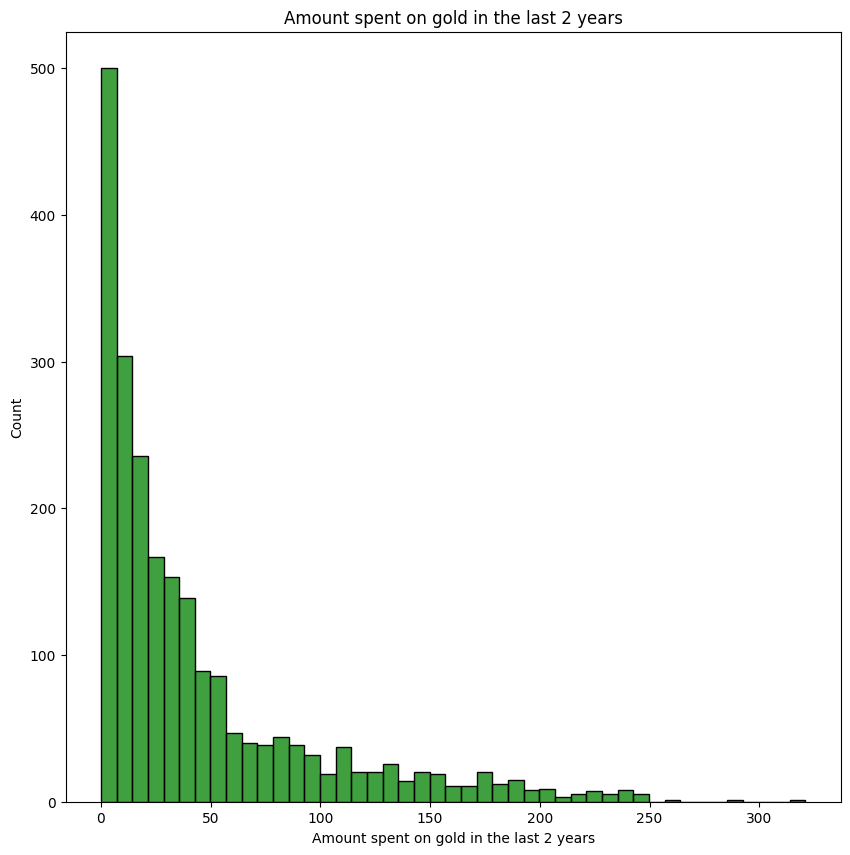

In [42]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntGoldProds', color='green')
plt.title('Amount spent on gold in the last 2 years')
plt.xlabel('Amount spent on gold in the last 2 years')
plt.ylabel('Count')
plt.show()

**Overall the product columns have similar distributions. There are some clients that might be outliers and this will be kept in mind while the model is generated and will be removed if necessary.** 

### NumDealsPurchases

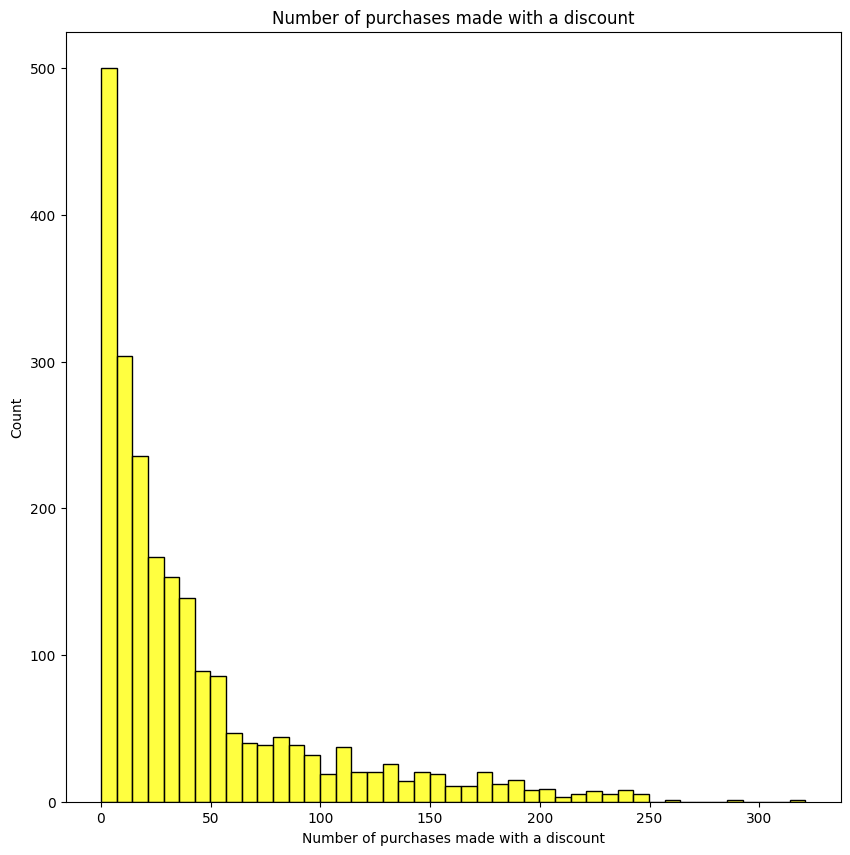

In [43]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='MntGoldProds', color='yellow')
plt.title('Number of purchases made with a discount')
plt.xlabel('Number of purchases made with a discount')
plt.ylabel('Count')
plt.show()

### AcceptedCmp1

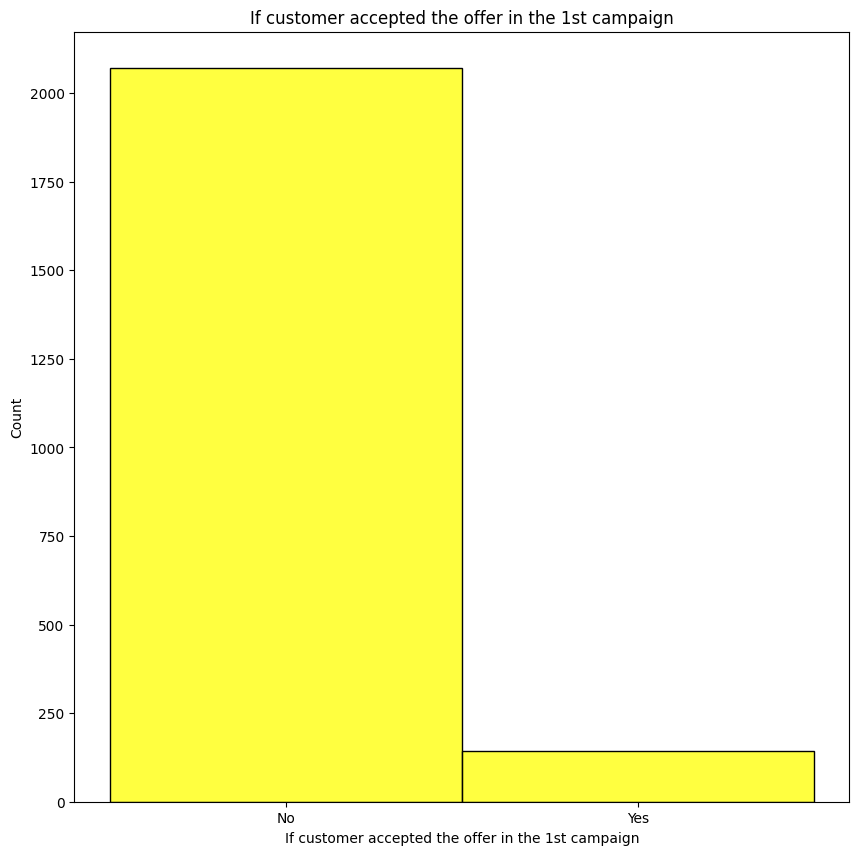

In [44]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp1', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 1st campaign')
plt.xlabel('If customer accepted the offer in the 1st campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp2

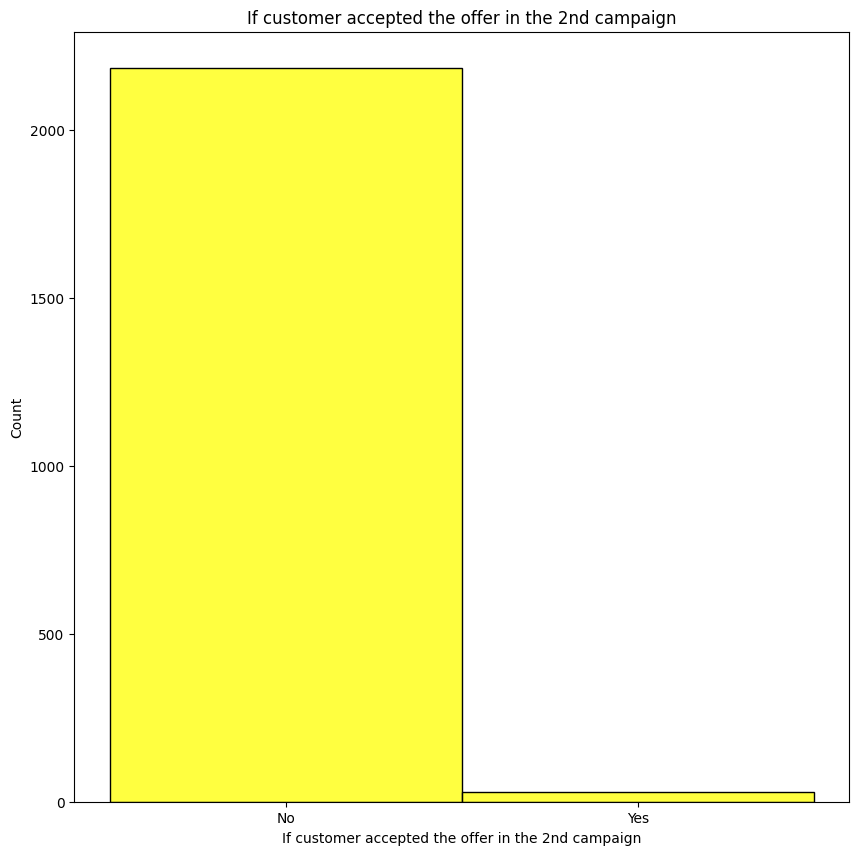

In [45]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp2', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 2nd campaign')
plt.xlabel('If customer accepted the offer in the 2nd campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp3

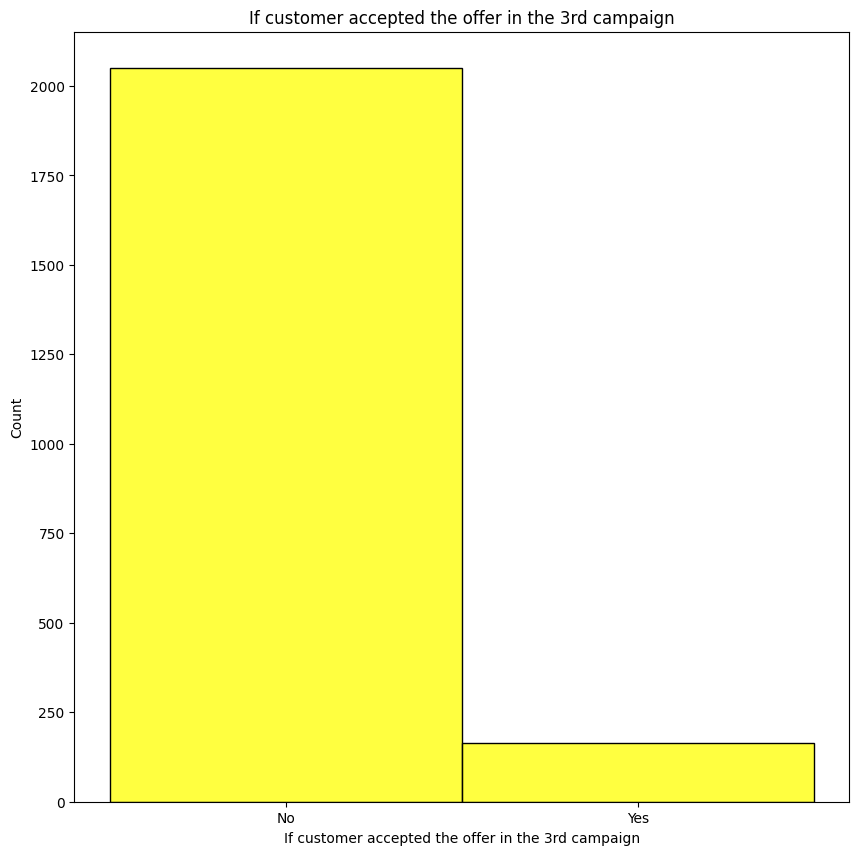

In [46]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp3', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 3rd campaign')
plt.xlabel('If customer accepted the offer in the 3rd campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp4

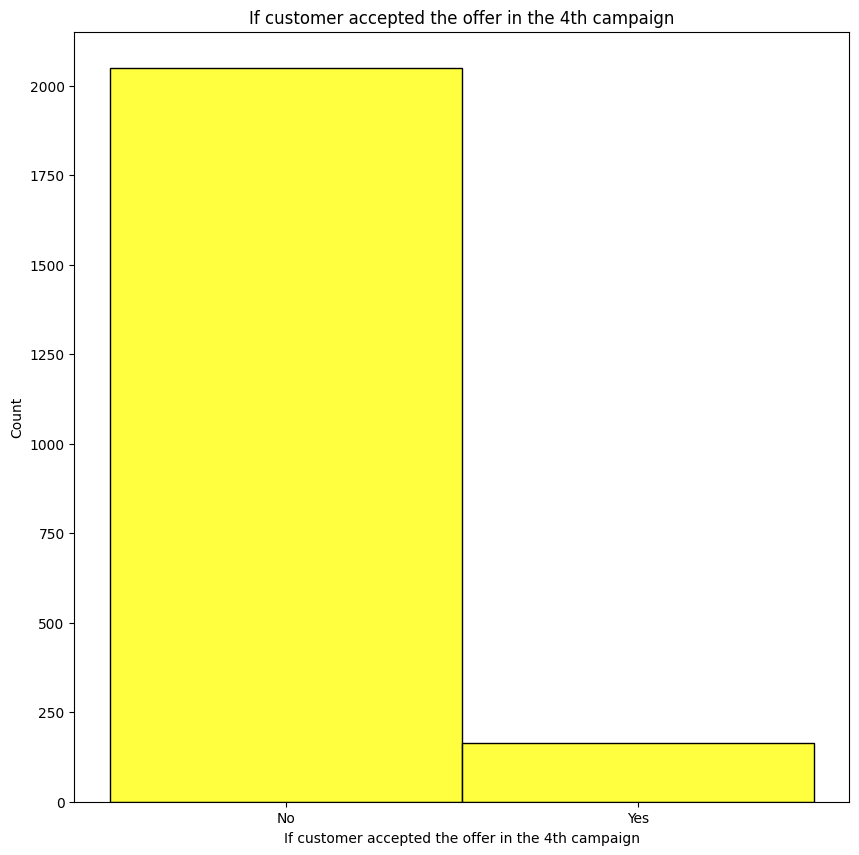

In [47]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp4', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 4th campaign')
plt.xlabel('If customer accepted the offer in the 4th campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### AcceptedCmp5

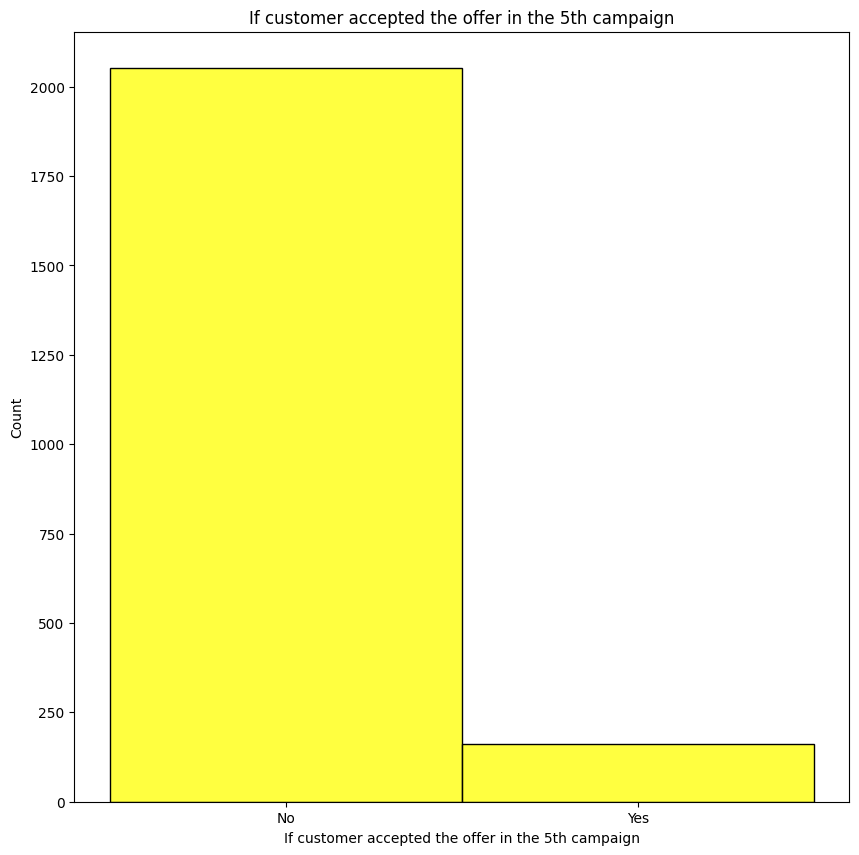

In [48]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='AcceptedCmp5', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the 5th campaign')
plt.xlabel('If customer accepted the offer in the 5th campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Response

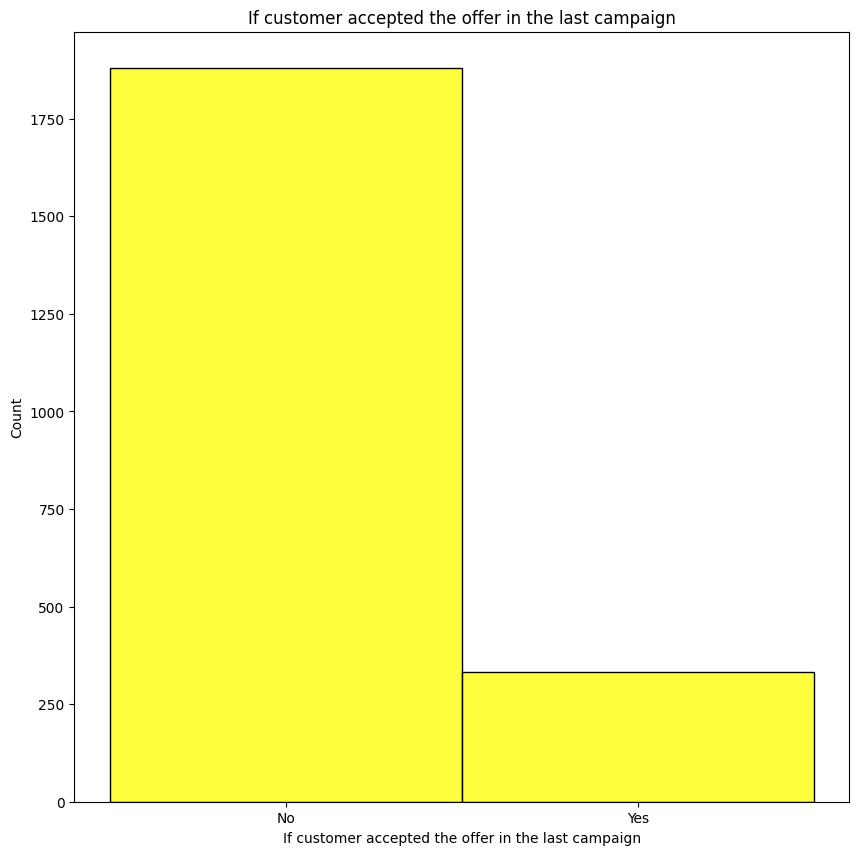

In [49]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='Response', color='yellow', bins=2, binrange=(-0.5, 1.5))
plt.title('If customer accepted the offer in the last campaign')
plt.xlabel('If customer accepted the offer in the last campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [50]:
# Getting the value counts
campaign1_vc = customer_data_ordered['AcceptedCmp1'].value_counts()
campaign2_vc = customer_data_ordered['AcceptedCmp2'].value_counts()
campaign3_vc = customer_data_ordered['AcceptedCmp3'].value_counts()
campaign4_vc = customer_data_ordered['AcceptedCmp4'].value_counts()
campaign5_vc = customer_data_ordered['AcceptedCmp5'].value_counts()
response_vc = customer_data_ordered['Response'].value_counts()

# Concatenating in a new dataframe
campaign_results = pd.concat([campaign1_vc, campaign2_vc, campaign3_vc, campaign4_vc, campaign5_vc, response_vc], axis=1)

# Calculating totals and percentages
campaign_results['Average'] = campaign_results.mean(axis=1)
campaign_results['Percentage'] = round(campaign_results['Average'] / campaign_results['Average'].sum(), 2) * 100
campaign_results.rename(index={0: 'No', 1: 'Yes'}, inplace=True)

In [51]:
campaign_results

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Average,Percentage
No,2070,2182,2049,2048,2051,1879,2046.5,93.0
Yes,142,30,163,164,161,333,165.5,7.0


**Overal the distributions look pretty similar between campaigns, and the average of clients accepting the promotions is about 7%**

### NumWebPurchases

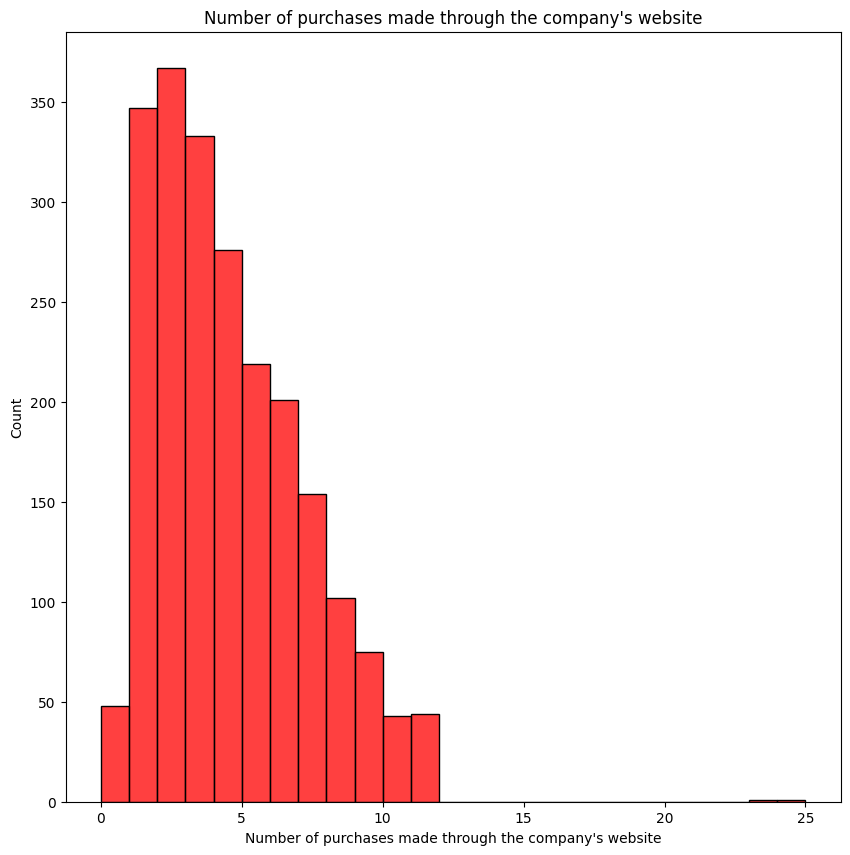

In [52]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='NumWebPurchases', color='red', bins=np.arange(0,26))
plt.title('Number of purchases made through the company\'s website')
plt.xlabel('Number of purchases made through the company\'s website')
plt.ylabel('Count')
plt.show()

### NumCatalogPurchases

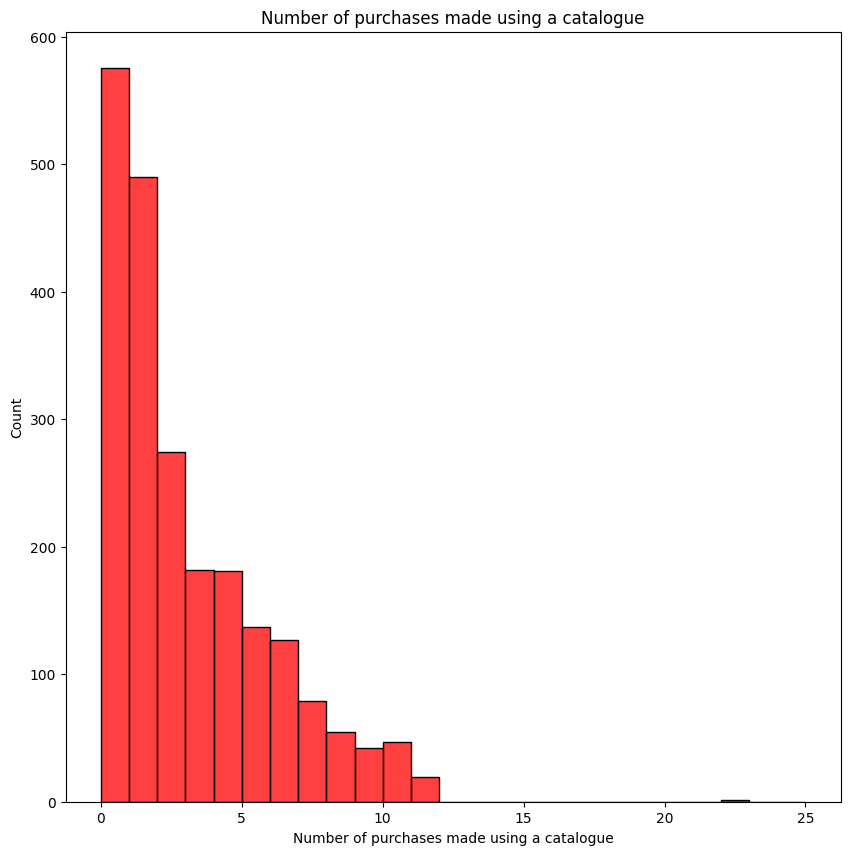

In [53]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='NumCatalogPurchases', color='red', bins=np.arange(0,26))
plt.title('Number of purchases made using a catalogue')
plt.xlabel('Number of purchases made using a catalogue')
plt.ylabel('Count')
plt.show()

### NumStorePurchases

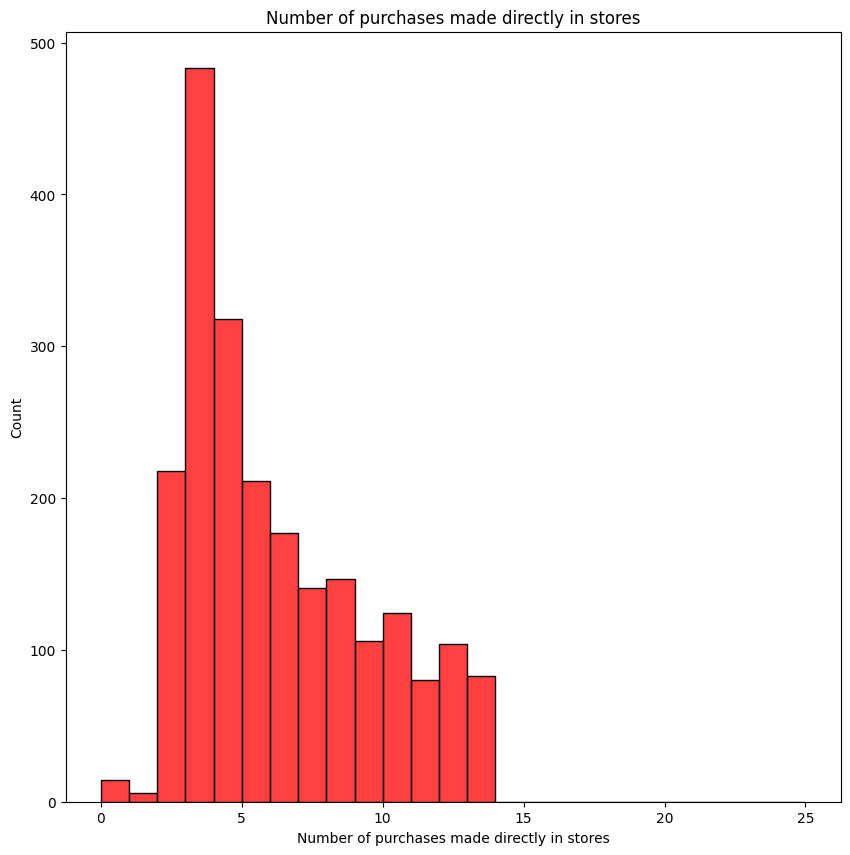

In [54]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='NumStorePurchases', color='red', bins=np.arange(0,26))
plt.title('Number of purchases made directly in stores')
plt.xlabel('Number of purchases made directly in stores')
plt.ylabel('Count')
plt.show()

### NumWebVisitsMonth

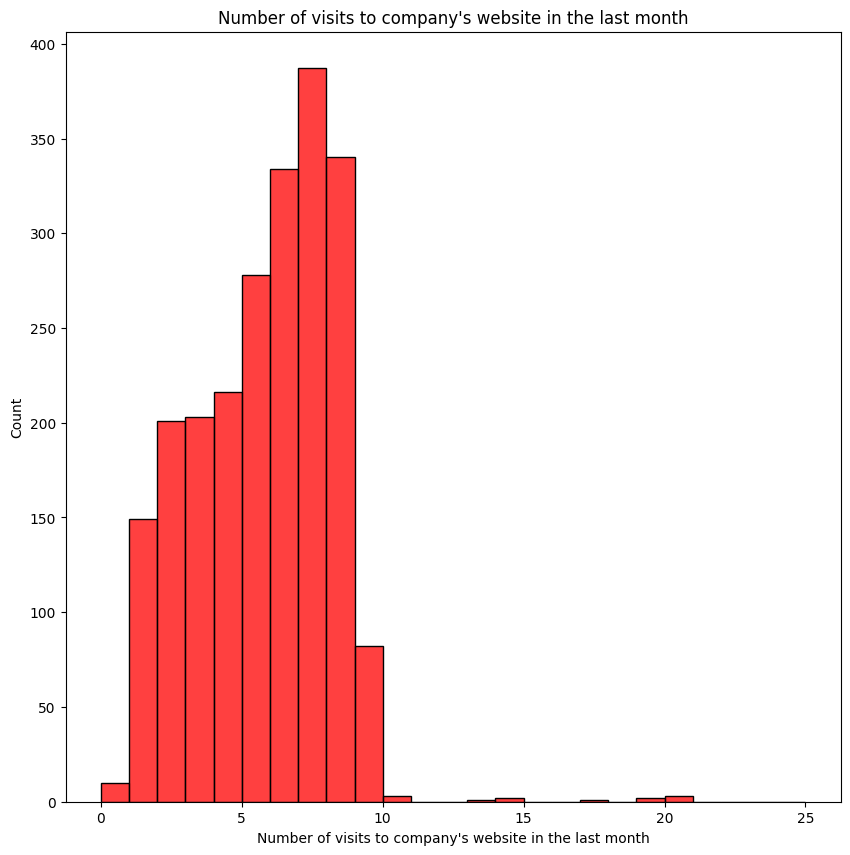

In [55]:
plt.figure(figsize=(10, 10))
sns.histplot(data=customer_data_ordered, x='NumWebVisitsMonth', color='red', bins=np.arange(0,26))
plt.title('Number of visits to company\'s website in the last month')
plt.xlabel('Number of visits to company\'s website in the last month')
plt.ylabel('Count')
plt.xticks(np.arange(0, 26, 5))
plt.show()

**The distributions of the purchases columns look fairly similar with the data positively skewed (towards the left).   
The distribution of the number of visits to the company's website also looks positively skewed, but to a higher degree.  
There are some clients that might be outliers and this will be kept in mind while the model is generated and will be removed if necessary.**

## Correlation Matrix

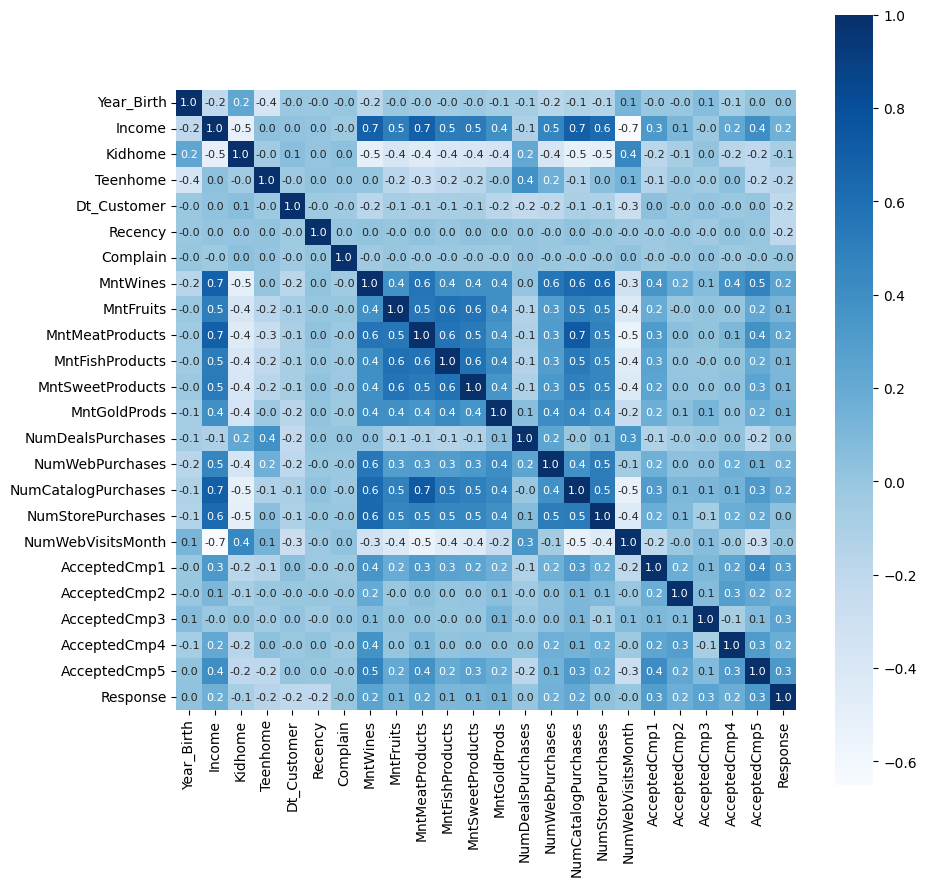

In [56]:
# Constructing heat map
correlation = customer_data_ordered.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues' )
plt.show()

In [57]:
customer_data_ordered.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2212.000000,2212,2212,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
unique,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1115,857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.913653,NaN,NaN,51958.810579,0.441682,0.505877,1.373439e+09,49.019439,0.009042,305.287523,...,4.088156,2.672242,5.806510,5.321429,0.064195,0.013562,0.073689,0.074141,0.072785,0.150542
std,11.701599,NaN,NaN,21527.278844,0.536955,0.544253,1.749556e+07,28.943121,0.094678,337.322940,...,2.742187,2.927542,3.250939,2.425597,0.245156,0.115691,0.261323,0.262060,0.259842,0.357683
min,1940.000000,NaN,NaN,1730.000000,0.000000,0.000000,1.343606e+09,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35233.500000,0.000000,0.000000,1.358294e+09,24.000000,0.000000,24.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51371.000000,0.000000,0.000000,1.373242e+09,49.000000,0.000000,175.500000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,68487.000000,1.000000,1.000000,1.388448e+09,74.000000,0.000000,505.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## General Insights

<ul>
    <li>Year of birth looks like a normal distribution between 1940 and 1996.</li>
    <li>The most common education level is "Graduation".</li>
    <li>The most common marital status is "Married".</li>
    <li>Mean income is 51958. Without taking into account a few values above 140.000 the distribution looks normal.</li>
    <li>Most clients don't have kids or teen at home and among those who do have, most of them just have 1 kid or teen. Out of the 2212 clients considered 97 have 2 kids or teens. No clients have more than 2.</li>
    <li>The date of enrollment looks like a uniform distribution, suggesting a steady enrollment.</li>
    <li>The recency also looks like a uniform distribution, suggesting similar numbers of clients that buy very often and more casual clients.</li>
    <li>Very few clients complained in the last 2 years.</li>
    <li>The distributions of products variables look similar and positively skewed</li>
    <li>Overal the distributions look pretty similar between campaigns, and the average of clients accepting the promotions is about 7%</li>
    <li>The distributions of place columns look similar and positively skewed.</li>
    <li>There is a correlation of 0.7 (highest observed) between income and Wine Products, Meat Products and Catalogue purchases, suggesting that these products and that place to make the purchases are preferred by high income clients.</li>
    <li>There is a correlation of 0.6 between Wine Products and Meat products, which suggests these products might be bought together often.</li>
    <li>The same correlation is observed between Fish-Fruits, Fish-Meat and Fish-Sweets</li>
    <li>There is a correlation of -0.7 between income and number of web visits, suggesting high income clients aren't visiting the website.</li>
</ul>

## Data Processing

In [58]:
customer_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Dt_Customer          2212 non-null   float64
 7   Recency              2212 non-null   int64  
 8   Complain             2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

In [59]:
customer_data_ordered.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Complain               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
dtype: int64

There are no null values in this dataframe.

In [60]:
# Separating text and numbers
customer_data_numbers = customer_data_ordered.select_dtypes(include='number')
customer_data_text = customer_data_ordered.select_dtypes(include='object')

In [61]:
print(customer_data_numbers.shape, customer_data_text.shape)

(2212, 24) (2212, 2)


In [62]:
customer_data_numbers.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,1957,58138.0,0,0,1.346717e+09,58,0,635,88,546,...,8,10,4,7,0,0,0,0,0,1
1,1954,46344.0,1,1,1.394237e+09,38,0,11,1,6,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,0,1.377043e+09,26,0,426,49,127,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,1,0,1.391990e+09,26,0,11,4,20,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,1,0,1.390090e+09,94,0,173,43,118,...,5,3,6,5,0,0,0,0,0,0


In [63]:
customer_data_text.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


### Number processing

For numbers StandardEncoder will be used.

In [64]:
numbers_scaler = StandardScaler() 

In [65]:
numbers_scaler.fit(customer_data_numbers)

StandardScaler()

In [66]:
customer_data_numbers_scaled = pd.DataFrame(data=numbers_scaler.transform(customer_data_numbers), columns=customer_data_numbers.columns)

In [67]:
customer_data_numbers_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,-1.018352,0.287105,-0.822754,-0.929699,-1.527721,0.310353,-0.09552,0.977660,1.552041,1.690293,...,1.426865,2.503607,-0.555814,0.692181,-0.261914,-0.117256,-0.282048,-0.282981,-0.280175,2.375425
1,-1.274785,-0.260882,1.040021,0.908097,1.189011,-0.380813,-0.09552,-0.872618,-0.637461,-0.718230,...,-1.126420,-0.571340,-1.171160,-0.132545,-0.261914,-0.117256,-0.282048,-0.282981,-0.280175,-0.420977
2,-0.334530,0.913196,-0.822754,-0.929699,0.206048,-0.795514,-0.09552,0.357935,0.570540,-0.178542,...,1.426865,-0.229679,1.290224,-0.544908,-0.261914,-0.117256,-0.282048,-0.282981,-0.280175,-0.420977
3,1.289547,-1.176114,1.040021,-0.929699,1.060584,-0.795514,-0.09552,-0.872618,-0.561961,-0.655787,...,-0.761665,-0.913000,-0.555814,0.279818,-0.261914,-0.117256,-0.282048,-0.282981,-0.280175,-0.420977
4,1.033114,0.294307,1.040021,-0.929699,0.951915,1.554453,-0.09552,-0.392257,0.419540,-0.218684,...,0.332600,0.111982,0.059532,-0.132545,-0.261914,-0.117256,-0.282048,-0.282981,-0.280175,-0.420977


### Text Processing

In [68]:
text_encoder = OneHotEncoder()

In [69]:
customer_data_text_encoded = pd.DataFrame(text_encoder.fit_transform(customer_data_text.values).toarray(), columns=text_encoder.get_feature_names_out(customer_data_text.columns))

In [70]:
customer_data_text_encoded.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Concatenating Numbers and Text

In [71]:
processed_customer_data = pd.concat([customer_data_numbers_scaled, customer_data_text_encoded], axis=1)

In [72]:
processed_customer_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-1.018352,0.287105,-0.822754,-0.929699,-1.527721,0.310353,-0.09552,0.977660,1.552041,1.690293,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.274785,-0.260882,1.040021,0.908097,1.189011,-0.380813,-0.09552,-0.872618,-0.637461,-0.718230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.334530,0.913196,-0.822754,-0.929699,0.206048,-0.795514,-0.09552,0.357935,0.570540,-0.178542,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.289547,-1.176114,1.040021,-0.929699,1.060584,-0.795514,-0.09552,-0.872618,-0.561961,-0.655787,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.033114,0.294307,1.040021,-0.929699,0.951915,1.554453,-0.09552,-0.392257,0.419540,-0.218684,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [73]:
processed_customer_data.shape

(2212, 34)

## Choosing the number of clusters 

WCSS ⟶
Within Clusters Sum of Squares

In [74]:
x = processed_customer_data.values

In [75]:
# Finding WCSS for different number of clusters
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  

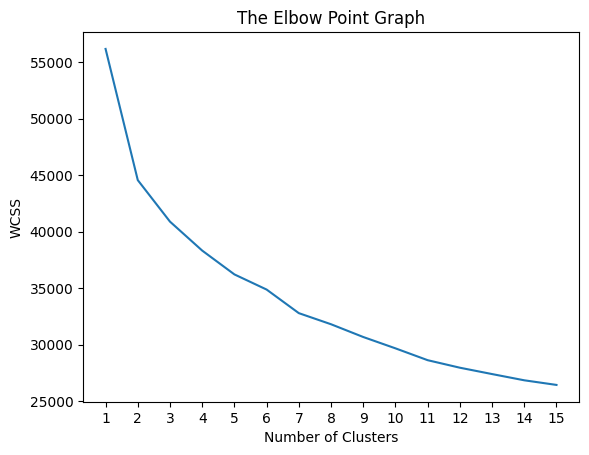

In [76]:
# Plot elbow graph to find out the number of clusters
plt.plot(range(1,16), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,16,1))
plt.show()

**Based on the graph, 6 clusters will be used, because the slope seems to lower consistently after that point.**

## Dimensionality Reduction and Training the K-Means Model

In [77]:
# T-SNE will be used to reduce dimensionality for visualization and to increase the K-Means performance (it deteriorates with higher number of dimensions)
dimensionality_reductor = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20, random_state=0)

In [78]:
x_reduced = dimensionality_reductor.fit_transform(x)

In [80]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0, n_init=20)

In [81]:
# Return a label for each data point based on their cluster
y = kmeans.fit_predict(x_reduced)
print(y)

[2 4 3 ... 5 0 2]


In [82]:
tsne_dataframe = pd.DataFrame(data=x_reduced, columns=['TSNE 1', 'TSNE 2'])
tsne_dataframe['Clusters'] = y

In [83]:
tsne_dataframe.head()

,TSNE 1,TSNE 2,Clusters
0,-36.860085,0.357809,2
1,49.532612,-15.521442,4
2,-12.118725,13.280287,3
3,9.913899,-56.851082,1
4,10.899562,-47.783890,1


In [84]:
tsne_dataframe.tail()

,TSNE 1,TSNE 2,Clusters
2207,0.625589,3.246392,3
2208,51.567265,0.416946,4
2209,5.152520,62.966396,5
2210,12.568566,28.845182,0
2211,-46.728691,-22.869253,2


## Visualizing the Clusters

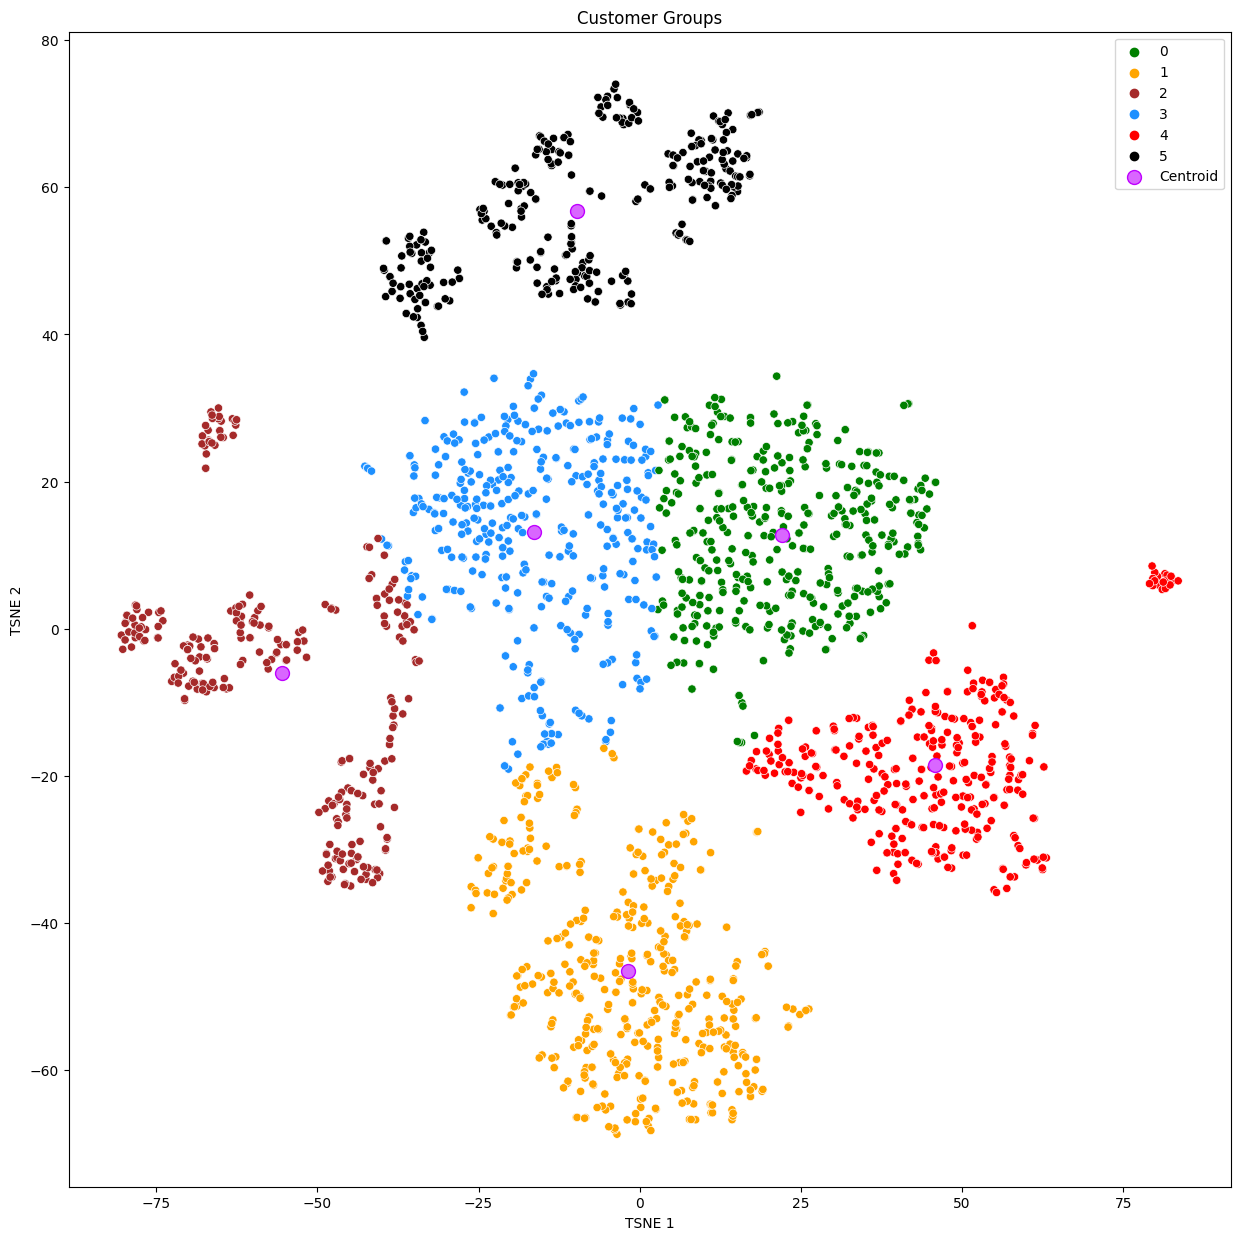

In [85]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tsne_dataframe, x="TSNE 1", y="TSNE 2", hue="Clusters", palette=['green','orange','brown','dodgerblue','red', 'black'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='#d966ff', label='Centroid', edgecolors='#bf00ff')

plt.title('Customer Groups')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend()

plt.show()

## Getting info for each cluster

In [86]:
# Creating a new copy of the dataframe to add the clusters.
customer_data_with_clusters = customer_data_ordered.copy()

In [87]:
# Adding the clusters
customer_data_with_clusters['Cluster'] = y

In [88]:
customer_data_with_clusters.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
0,1957,Graduation,Single,58138.0,0,0,1.346717e+09,58,0,635,...,10,4,7,0,0,0,0,0,1,2
1,1954,Graduation,Single,46344.0,1,1,1.394237e+09,38,0,11,...,1,2,5,0,0,0,0,0,0,4
2,1965,Graduation,Together,71613.0,0,0,1.377043e+09,26,0,426,...,2,10,4,0,0,0,0,0,0,3
3,1984,Graduation,Together,26646.0,1,0,1.391990e+09,26,0,11,...,0,4,6,0,0,0,0,0,0,1
4,1981,PhD,Married,58293.0,1,0,1.390090e+09,94,0,173,...,3,6,5,0,0,0,0,0,0,1


In [89]:
customer_data_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Dt_Customer          2212 non-null   float64
 7   Recency              2212 non-null   int64  
 8   Complain             2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

In [90]:
# Turning back the timestamps on Dt_Customer to date.
customer_data_with_clusters['Dt_Customer'] = pd.to_datetime(customer_data_with_clusters['Dt_Customer'], unit='s').dt.date

In [110]:
# Changing Complain to yes or no values
customer_data_with_clusters['Complain'] = customer_data_with_clusters['Complain'].replace({0: 'no', 1: 'yes'})
# Changing AcceptedCmp to yes or no values
customer_data_with_clusters['AcceptedCmp1'] = customer_data_with_clusters['AcceptedCmp1'].replace({0: 'no', 1: 'yes'})
customer_data_with_clusters['AcceptedCmp2'] = customer_data_with_clusters['AcceptedCmp2'].replace({0: 'no', 1: 'yes'})
customer_data_with_clusters['AcceptedCmp3'] = customer_data_with_clusters['AcceptedCmp3'].replace({0: 'no', 1: 'yes'})
customer_data_with_clusters['AcceptedCmp4'] = customer_data_with_clusters['AcceptedCmp4'].replace({0: 'no', 1: 'yes'})
customer_data_with_clusters['AcceptedCmp5'] = customer_data_with_clusters['AcceptedCmp5'].replace({0: 'no', 1: 'yes'})
customer_data_with_clusters['Response'] = customer_data_with_clusters['Response'].replace({0: 'no', 1: 'yes'})

In [111]:
customer_data_with_clusters.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
count,2212.000000,2212,2212,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212,2212.000000,...,2212.000000,2212.000000,2212.000000,2212,2212,2212,2212,2212,2212,2212.000000
unique,NaN,5,5,NaN,NaN,NaN,662,NaN,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,no,NaN,...,NaN,NaN,NaN,no,no,no,no,no,no,NaN
freq,NaN,1115,857,NaN,NaN,NaN,12,NaN,2192,NaN,...,NaN,NaN,NaN,2070,2182,2049,2048,2051,1879,NaN
mean,1968.913653,NaN,NaN,51958.810579,0.441682,0.505877,NaN,49.019439,NaN,305.287523,...,2.672242,5.806510,5.321429,NaN,NaN,NaN,NaN,NaN,NaN,2.293400
std,11.701599,NaN,NaN,21527.278844,0.536955,0.544253,NaN,28.943121,NaN,337.322940,...,2.927542,3.250939,2.425597,NaN,NaN,NaN,NaN,NaN,NaN,1.698775
min,1940.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1959.000000,NaN,NaN,35233.500000,0.000000,0.000000,NaN,24.000000,NaN,24.000000,...,0.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1970.000000,NaN,NaN,51371.000000,0.000000,0.000000,NaN,49.000000,NaN,175.500000,...,2.000000,5.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,1977.000000,NaN,NaN,68487.000000,1.000000,1.000000,NaN,74.000000,NaN,505.000000,...,4.000000,8.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


## Generating the info for each column

In [123]:
for i in range(6):
    cluster = customer_data_with_clusters.loc[customer_data_with_clusters['Cluster'] == i]
    print(f"Cluster {i}")
    # People
    print(f"Average year of birth: {int(cluster['Year_Birth'].mean())}")
    print(f"Most frequent education level: {cluster['Education'].mode()[0]}")
    print(f"Most frequent marital status: {cluster['Marital_Status'].mode()[0]}")
    print(f"Average income: {int(cluster['Income'].mean())}")
    print(f"Average kids at home: {int(cluster['Kidhome'].mean())}")
    print(f"Average teens at home: {int(cluster['Teenhome'].mean())}")
    print(f"Most frequent date of enrollment: {cluster['Dt_Customer'].mode()[0]}")
    print(f"Average days since last purchase: {int(cluster['Recency'].mean())}")
    print(f"Most frequent complain status in last 2 years: {cluster['Complain'].mode()[0]}")
    
    # Products
    print(f"Average amount spent on wine in last 2 years: {int(cluster['MntWines'].mean())}")
    print(f"Average amount spent on fruits in last 2 years: {int(cluster['MntFruits'].mean())}")
    print(f"Average amount spent on meat in last 2 years: {int(cluster['MntMeatProducts'].mean())}")
    print(f"Average amount spent on fish in last 2 years: {int(cluster['MntFishProducts'].mean())}")
    print(f"Average amount spent on sweets in last 2 years: {int(cluster['MntSweetProducts'].mean())}")
    print(f"Average amount spent on gold in last 2 years: {int(cluster['MntGoldProds'].mean())}")
    
    # Promotion
    print(f"Average number of purchases made with a discount: {int(cluster['NumDealsPurchases'].mean())}")
    print(f"Most common acceptance in the 1st campaign: {cluster['AcceptedCmp1'].mode()[0]}")
    print(f"Most common acceptance in the 2nd campaign: {cluster['AcceptedCmp2'].mode()[0]}")
    print(f"Most common acceptance in the 3rd campaign: {cluster['AcceptedCmp3'].mode()[0]}")
    print(f"Most common acceptance in the 4th campaign: {cluster['AcceptedCmp4'].mode()[0]}")
    print(f"Most common acceptance in the 5th campaign: {cluster['AcceptedCmp5'].mode()[0]}")
    print(f"Most common acceptance in the last campaign: {cluster['Response'].mode()[0]}")
    
    # Place
    print(f"Average number of purchases made through the company\'s website: {int(cluster['NumWebPurchases'].mean())}")
    print(f"Average number of purchases made using a catalogue: {int(cluster['NumCatalogPurchases'].mean())}")
    print(f"Average number of purchases made directly in stores: {int(cluster['NumStorePurchases'].mean())}")
    print(f"Average number of visits to company\'s website in the last month: {int(cluster['NumWebVisitsMonth'].mean())}")
    
    print('-' * 120)

Cluster 0
Average year of birth: 1963
Most frequent education level: Graduation
Most frequent marital status: Married
Average income: 56181
Average kids at home: 0
Average teens at home: 1
Most frequent date of enrollment: 2012-08-03
Average days since last purchase: 48
Most frequent complain status in last 2 years: no
Average amount spent on wine in last 2 years: 330
Average amount spent on fruits in last 2 years: 16
Average amount spent on meat in last 2 years: 104
Average amount spent on fish in last 2 years: 23
Average amount spent on sweets in last 2 years: 17
Average amount spent on gold in last 2 years: 47
Average number of purchases made with a discount: 2
Most common acceptance in the 1st campaign: no
Most common acceptance in the 2nd campaign: no
Most common acceptance in the 3rd campaign: no
Most common acceptance in the 4th campaign: no
Most common acceptance in the 5th campaign: no
Most common acceptance in the last campaign: no
Average number of purchases made through the

## Getting sumarized data

Some considerations:
<ul>
    <li>The column Education, won't be considered because it's the same for all the clusters.</li>
    <li>The column Recency, won't be considered because the average are all very close to 50.</li>
    <li>The column Complain, won't be considered because the most common value is "no" for all the clusters.</li>
</ul>

In [169]:
today = datetime.date.today()
today_year = today.year

sumarized_data = {
    'Average age': [],
    'Frequent marital status': [],
    'Average income': [],
    'Average kids': [],
    'Average teens': [],
    'Frequent date of enrollment': []
}


for i in range(6):
    cluster = customer_data_with_clusters.loc[customer_data_with_clusters['Cluster'] == i]
    # Age
    ages = today_year - cluster['Year_Birth']
    sumarized_data['Average age'].append(int(ages.mean()))
    # Marital Status
    sumarized_data['Frequent marital status'].append(cluster['Marital_Status'].mode()[0])
    # Income
    sumarized_data['Average income'].append(int(cluster['Income'].mean()))
    # Kids
    sumarized_data['Average kids'].append(int(cluster['Kidhome'].mean()))
    # Teens
    sumarized_data['Average teens'].append(int(cluster['Teenhome'].mean()))
    # Date of enrollment
    sumarized_data['Frequent date of enrollment'].append(cluster['Dt_Customer'].mode()[0])

In [170]:
a = pd.DataFrame(sumarized_data, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
a

,Average age,Frequent marital status,Average income,Average kids,Average teens,Frequent date of enrollment
Cluster 0,59,Married,56181,0,1,2012-08-03
Cluster 1,44,Married,29383,0,0,2014-05-22
Cluster 2,53,Single,47896,0,0,2012-11-09
Cluster 3,55,Married,68204,0,0,2014-04-05
Cluster 4,57,Married,42656,1,1,2012-11-03
Cluster 5,55,Married,74195,0,0,2012-11-10
